In [ ]:
#Summary of the What's the Weather Like?
# In this scenario, we can conclude that the latitude has an impact on the temperature
# As we can see in the Northern Hemisphere if the country is farther from the equator the temperatures will decrease. 
# but in the Southern Hemisphere  if the country is nearest to the equator the temperatures will increase.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Build URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="

city_data = []

#grouping variables
record = 1 
set_count = 1

print(f"Beginning Data Retrieval")
print(f"------------------------------")

#Group the cities in sets of 50
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count+=1
        record=0
        
    print(f"Processing Record {record} of Set {set_count} | {city}")
    
    # Increase record count within the set
    record +=1
    
    city_url = url + city
    
    try:
        city_weather = requests.get(city_url).json()
        
        #Parce out data
        lat = city_weather["coord"]["lat"]
        lon = city_weather["coord"]["lon"]
        max_temp = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        date = city_weather["dt"]
        country = city_weather["sys"]["country"]
        
        city_data.append({"City": city,
                         "Lat": lat,
                         "Lng": lon,
                         "Max Temp": max_temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Date": date,
                         "Country": country})
    except:
        print("City not found. Skipping...")
        pass
    #if (i==5):
        #break

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | lorengau
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | pierre
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | laguna
Processing Record 15 of Set 1 | bara
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | mogadishu
Processing Record 18 of Set 1 | vila
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | the valley
Processing Record 22 of Set 1 | k

Processing Record 38 of Set 4 | haines junction
Processing Record 39 of Set 4 | george
Processing Record 40 of Set 4 | bereznehuvate
Processing Record 41 of Set 4 | anadyr
Processing Record 42 of Set 4 | quatre cocos
Processing Record 43 of Set 4 | touros
Processing Record 44 of Set 4 | kayerkan
Processing Record 45 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 4 | sept-iles
Processing Record 47 of Set 4 | toulepleu
City not found. Skipping...
Processing Record 48 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 4 | talnakh
Processing Record 0 of Set 5 | nanortalik
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | raudeberg
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | la ronge
Processing Record 5 of Set 5 | vylok
Processing Record 6 of Set 5 | neiafu
Processing Record 7 of Set 5 | toamasina
Processing Record 8 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 9 o

Processing Record 26 of Set 8 | terney
Processing Record 27 of Set 8 | marsa matruh
Processing Record 28 of Set 8 | ambatofinandrahana
Processing Record 29 of Set 8 | mahajanga
Processing Record 30 of Set 8 | bayanday
Processing Record 31 of Set 8 | yomou
Processing Record 32 of Set 8 | betera
Processing Record 33 of Set 8 | komsomolskiy
Processing Record 34 of Set 8 | bloomfield
Processing Record 35 of Set 8 | russell
Processing Record 36 of Set 8 | porbandar
Processing Record 37 of Set 8 | vagur
Processing Record 38 of Set 8 | dunedin
Processing Record 39 of Set 8 | iqaluit
Processing Record 40 of Set 8 | saskylakh
Processing Record 41 of Set 8 | giddarbaha
Processing Record 42 of Set 8 | tunduru
City not found. Skipping...
Processing Record 43 of Set 8 | sao filipe
Processing Record 44 of Set 8 | bumba
Processing Record 45 of Set 8 | nemuro
Processing Record 46 of Set 8 | frederico westphalen
Processing Record 47 of Set 8 | luena
Processing Record 48 of Set 8 | khandyga
Processing R

Processing Record 13 of Set 12 | villa union
Processing Record 14 of Set 12 | irati
Processing Record 15 of Set 12 | dinguiraye
Processing Record 16 of Set 12 | trelew
Processing Record 17 of Set 12 | winnemucca
Processing Record 18 of Set 12 | pandrup
Processing Record 19 of Set 12 | innisfail
Processing Record 20 of Set 12 | yining
Processing Record 21 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 22 of Set 12 | osoyoos
Processing Record 23 of Set 12 | varhaug
Processing Record 24 of Set 12 | mecca
Processing Record 25 of Set 12 | mangrol
Processing Record 26 of Set 12 | tilichiki
Processing Record 27 of Set 12 | ixtapa
Processing Record 28 of Set 12 | bajil
Processing Record 29 of Set 12 | balad
Processing Record 30 of Set 12 | tucuman
Processing Record 31 of Set 12 | alofi
Processing Record 32 of Set 12 | challapata
Processing Record 33 of Set 12 | cabra
Processing Record 34 of Set 12 | buchanan
Processing Record 35 of Set 12 | ushtobe
Processing Record 36

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,avarua,-21.2078,-159.7750,78.80,83,75,27.63,1619128605,CK
1,longyearbyen,78.2186,15.6401,17.60,62,75,1.48,1619128605,SJ
2,port elizabeth,-33.9180,25.5701,64.40,88,0,13.80,1619128605,ZA
3,cape town,-33.9258,18.4232,60.01,94,75,11.50,1619128350,ZA
4,lorengau,-2.0226,147.2712,82.27,78,100,3.98,1619128606,PG


In [7]:
# I found in this web page https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html a simple way to 
# generate descriptive statistics.

city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,20.096004,18.866977,59.031602,69.471831,57.757042,8.464859,1.619129e+09
std,33.803566,90.318803,19.735486,22.746884,37.387444,6.019466,7.544738e+01
min,-54.800000,-179.166700,-2.610000,8.000000,0.000000,0.070000,1.619128e+09
25%,-8.245875,-59.583350,45.052500,54.000000,20.000000,3.980000,1.619129e+09
50%,25.502300,22.652700,61.000000,76.000000,75.000000,6.910000,1.619129e+09
75%,47.892875,96.076250,76.005000,87.000000,93.000000,11.500000,1.619129e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,42.080000,1.619129e+09


In [8]:
# Export the csv file to use later
city_data_pd.to_csv("city_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
city_data_humidity = city_data_pd[(city_data_pd["Humidity"] > 100)].index
city_data_humidity

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(city_data_humidity, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,avarua,-21.2078,-159.7750,78.80,83,75,27.63,1619128605,CK
1,longyearbyen,78.2186,15.6401,17.60,62,75,1.48,1619128605,SJ
2,port elizabeth,-33.9180,25.5701,64.40,88,0,13.80,1619128605,ZA
3,cape town,-33.9258,18.4232,60.01,94,75,11.50,1619128350,ZA
4,lorengau,-2.0226,147.2712,82.27,78,100,3.98,1619128606,PG
...,...,...,...,...,...,...,...,...,...
563,sorong,-0.8833,131.2500,78.39,87,82,4.36,1619128788,ID
564,hazorasp,41.3194,61.0742,53.60,24,0,9.22,1619128788,UZ
565,okhotsk,59.3833,143.3000,29.52,96,100,7.36,1619128788,RU
566,sola,-13.8833,167.5500,80.60,94,90,3.44,1619128649,VU


In [11]:
latitude = clean_city_data["Lat"]
max_temperatures = clean_city_data["Max Temp"]
city_humidity = clean_city_data["Humidity"]
city_cloudiness = clean_city_data["Cloudiness"]
city_wind_speed = clean_city_data["Wind Speed"]

clean_city_data.to_csv("../output_data/cities.csv", index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

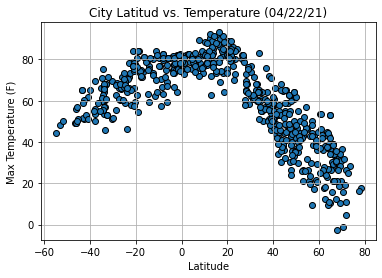

In [12]:
# Scatter plot for latitud vs. temperature
plt.scatter(latitude, max_temperatures, edgecolor="black", linewidths=1, marker="o", label="cities")

#setting a title, labels and grig for the chart
plt.title("City Latitud vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("../output_data/Fig1.png")

# Cleaning the bar chart
plt.show()

## Latitude vs. Humidity Plot

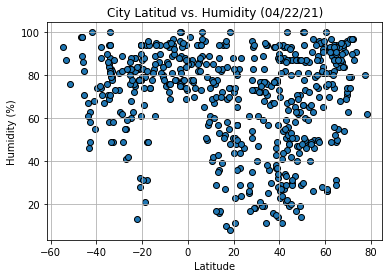

In [13]:
# scatter plot for latitud vs. humidity
plt.scatter(latitude, city_humidity, edgecolor="black", linewidths=1, marker="o", label="cities")

#setting a title, labels and grig for the chart
plt.title("City Latitud vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("../output_data/Fig2.png")

# Cleaning the bar chart
plt.show()

## Latitude vs. Cloudiness Plot

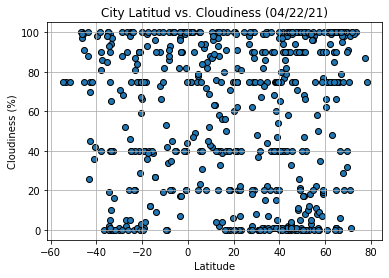

In [14]:
# scatter plot for latitud vs. cloudiness
plt.scatter(latitude, city_cloudiness, edgecolor="black", linewidths=1, marker="o", label="cities")

# setting a title, labels and grig for the chart
plt.title("City Latitud vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Cleaning the bar chart
plt.show()

## Latitude vs. Wind Speed Plot

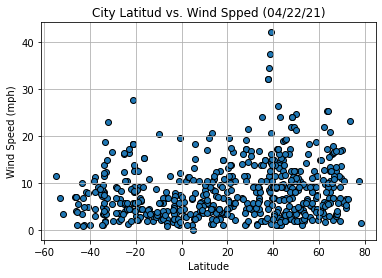

In [15]:
# scatter plot for latitud vs. Wind Speed
plt.scatter(latitude, city_wind_speed, edgecolor="black", linewidths=1, marker="o", label="cities")

# setting a title, labels and grig for the chart
plt.title("City Latitud vs. Wind Spped (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Cleaning the bar chart
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-Value is: 0.7892821294201323


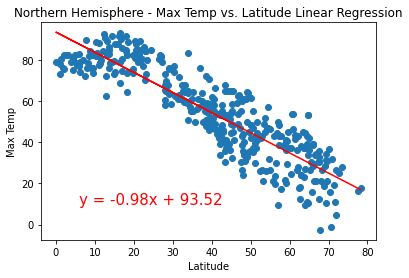

In [16]:
# Northern Hemisphere DataFrame
northern_hemis = city_data_pd.loc[(city_data_pd["Lat"] >=0)]

# Scatter plot with linear regression
x_values = northern_hemis['Lat']
y_values = northern_hemis['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Setting a title, labels and print for the chart
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-Value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-Value is: 0.5145129896165686


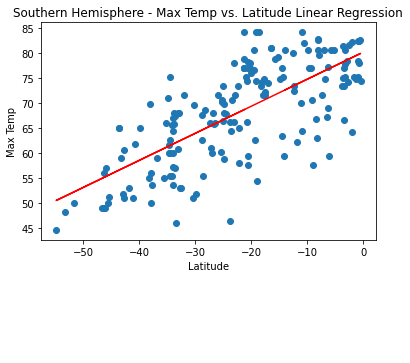

In [17]:
# Southern Hemisphere DataFrame
southern_hemis = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

# Scatter plot with linear regression
x_values = southern_hemis['Lat']
y_values = southern_hemis['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Setting a title, labels and print for the chart
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-Value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-Value is: 0.01841031412769993


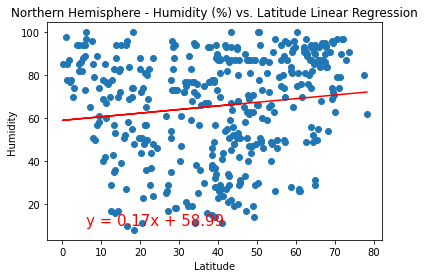

In [18]:
# Northern Hemisphere DataFrame
northern_hemis = city_data_pd.loc[(city_data_pd["Lat"] >=0)]

# Scatter plot with linear regression
x_values = northern_hemis['Lat']
y_values = northern_hemis['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Setting a title, labels and print for the chart
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-Value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-Value is: 0.0289101598007845


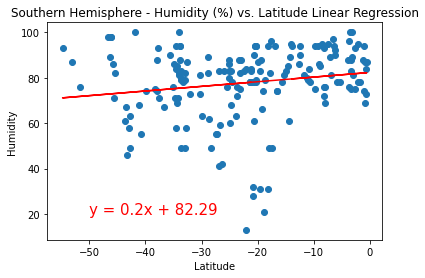

In [19]:
# Southern Hemisphere DataFrame
southern_hemis = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

# Scatter plot with linear regression
x_values = southern_hemis['Lat']
y_values = southern_hemis['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

#Setting a title, labels and print for the chart
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-Value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-Value is: 0.001832632169937141


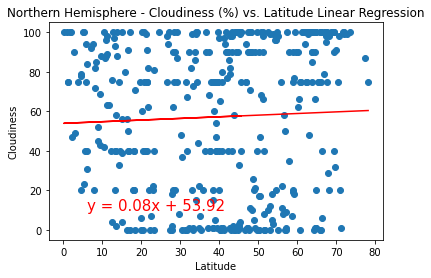

In [20]:
# Northern Hemisphere DataFrame
northern_hemis = city_data_pd.loc[(city_data_pd["Lat"] >=0)]

# Scatter plot with linear regression
x_values = northern_hemis['Lat']
y_values = northern_hemis['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Setting a title, labels and print for the chart
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-Value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-Value is: 0.0005202067795810248


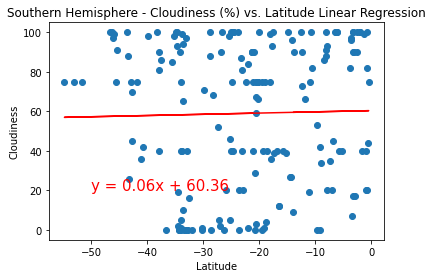

In [21]:
# Southern Hemisphere DataFrame
southern_hemis = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

# Scatter plot with linear regression
x_values = southern_hemis['Lat']
y_values = southern_hemis['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Setting a title, labels and print for the chart
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-Value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-Value is: 0.010239079759915575


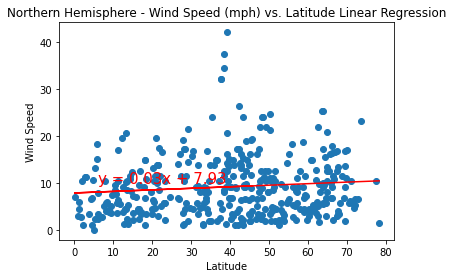

In [22]:
# Northern Hemisphere DataFrame
northern_hemis = city_data_pd.loc[(city_data_pd["Lat"] >=0)]

# Scatter plot with linear regression
x_values = northern_hemis['Lat']
y_values = northern_hemis['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Setting a title, labels and print for the chart
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-Value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-Value is: 0.008511611099241733


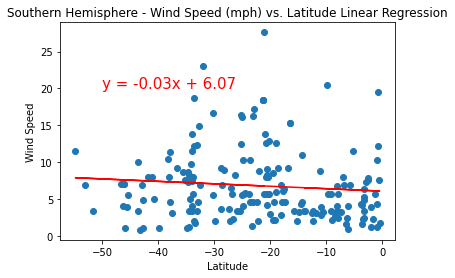

In [23]:
# Southern Hemisphere DataFrame
southern_hemis = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

# Scatter plot with linear regression
x_values = southern_hemis['Lat']
y_values = southern_hemis['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Setting a title, labels and print for the chart
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-Value is: {rvalue**2}")
plt.show()